In [1]:
import os
import sys

home=os.path.expanduser("~")
os.environ["SPARK_HOME"]=os.path.join(home, 'spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [2]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).getOrCreate()

# gradient

* 모든 계수 θ=1 (또는 무작위)
* 반복
    θ 갱신
    θj:=θj−α∂∂θjJ(θ)
* 실제와 예측의 차이인 오류 (y−yhat)2를 최소화하는 베타 값을 구해보자

In [17]:
import sympy as sp
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
b0,b1=sp.symbols('b0 b1')
print np.sum(-2 * (y-(b0+x.dot(b1)))) #b0에 대해서 편미분
print np.sum(-2 * x * (y-(b0+x.dot(b1)))) #b1에 대해서 편미분

8*b0 + 20*b1 - 56
20*b0 + 60*b1 - 154


In [18]:
x=np.array([x,np.ones(len(x))])  # w0 * x0 + w1 * x1
x=x.T
print x, x.shape

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]] (4, 2)


In [23]:
theta=np.array(np.ones([x.shape[1]]))
print theta
print '\n'
print x*theta
print '\n'
print np.dot(x,theta)

[1. 1.]


[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]


[2. 3. 4. 5.]


In [20]:
def h(x,theta):
    return np.dot(x,theta)

h(x,theta)

array([2., 3., 4., 5.])

In [24]:
error=h(x,theta)-y
print error

[-4. -2. -3. -5.]


# gradient update

In [25]:
print np.sum(y-h(x,theta))*(-2)/len(x)

-7.0


In [27]:
print x.T

gradient=np.dot(x.T,error)
print gradient

[[1. 2. 3. 4.]
 [1. 1. 1. 1.]]
[-37. -14.]


In [28]:
alpha=0.01
theta -= alpha*gradient
print theta

[1.37 1.14]


In [29]:
alpha=0.01
numIterations=4000
theta=np.ones([x.shape[1]])
#theta=np.array([1,1])
for i in range(numIterations):
    h=np.dot(x,theta)
    error=h-y
    #gradient=[np.sum(y-h)*(-2), np.sum((y-h)*x)*(-2)]
    cost = np.sum((h-y)** 2) / (2 * len(x))
    gradient=np.dot(x.T,error) # w0, w1
    theta -= alpha*gradient
    if i%100 == 0:
        print "Iteration {0} | theta {1} Cost {2:.5f}".format(i, theta, cost)

Iteration 0 | theta [1.37 1.14] Cost 6.75000
Iteration 100 | theta [1.79291203 2.34479071] Cost 0.63779
Iteration 200 | theta [1.61550957 2.86637557] Cost 0.55893
Iteration 300 | theta [1.51820553 3.15246131] Cost 0.53521
Iteration 400 | theta [1.46483493 3.3093774 ] Cost 0.52807
Iteration 500 | theta [1.43556152 3.3954448 ] Cost 0.52592
Iteration 600 | theta [1.41950525 3.44265218] Cost 0.52528
Iteration 700 | theta [1.4106985  3.46854511] Cost 0.52508
Iteration 800 | theta [1.40586805 3.48274721] Cost 0.52503
Iteration 900 | theta [1.40321859 3.49053696] Cost 0.52501
Iteration 1000 | theta [1.40176537 3.49480959] Cost 0.52500
Iteration 1100 | theta [1.4009683  3.49715309] Cost 0.52500
Iteration 1200 | theta [1.4005311  3.49843849] Cost 0.52500
Iteration 1300 | theta [1.40029131 3.49914352] Cost 0.52500
Iteration 1400 | theta [1.40015978 3.49953023] Cost 0.52500
Iteration 1500 | theta [1.40008764 3.49974233] Cost 0.52500
Iteration 1600 | theta [1.40004807 3.49985867] Cost 0.52500
Iter

# 예제 : 온도

In [30]:
import numpy as np

x=np.arange(0,9)
y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]
A=np.array([x,np.ones(len(x))])

print A
print A.T

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]
 [8. 1.]]


In [31]:
w=np.linalg.lstsq(A.T,y)[0]
fitted=w[0]*x+w[1]
print fitted

[19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


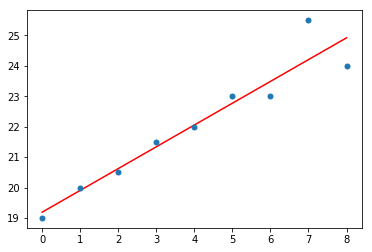

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(x,fitted,'r-',x,y,'o',markersize=5)
plt.show()

In [33]:
def drawRegress2d(x,y):
    import matplotlib.pyplot as plt 
    import numpy as np
    A=np.array([x,np.ones(len(x))])
    w=np.linalg.lstsq(A.T,y)[0]
    fitted=w[0]*x+w[1]
    #plt.plot(x,y,'r-',xi,y,'o',markersize=5)
    plt.plot(x, y, 'o-', label='Original data', markersize=5)
    plt.plot(x, fitted, 'r', label='Fitted line')
    plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


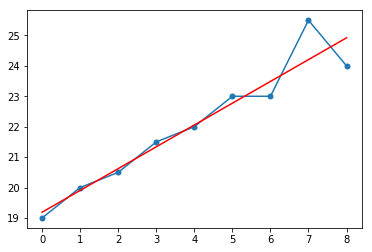

In [34]:
%matplotlib inline

import numpy as np
x=np.arange(0,9)
y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24] 
drawRegress2d(x,y)

# 정규화 회귀모형

In [35]:
import pandas as pd
file_name="http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone = pd.read_csv(file_name, names=column_names)

In [36]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [37]:
abalone.sample(n=10)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
3562,F,0.570,0.420,0.160,0.8875,0.4315,0.1915,0.2230,8
2953,F,0.645,0.520,0.170,1.1970,0.5260,0.2925,0.3170,11
1383,F,0.625,0.480,0.155,1.2035,0.5865,0.2390,0.3185,12
958,I,0.500,0.385,0.120,0.5600,0.2835,0.1030,0.1350,8
3105,I,0.290,0.215,0.060,0.1115,0.0530,0.0185,0.0320,5
943,I,0.465,0.345,0.110,0.4415,0.1755,0.0905,0.1200,7
3372,I,0.440,0.330,0.135,0.5220,0.1700,0.0905,0.1950,16
1227,I,0.350,0.255,0.090,0.1785,0.0855,0.0305,0.0525,8
3481,I,0.465,0.345,0.105,0.4015,0.2420,0.0345,0.1090,6
2833,F,0.540,0.415,0.150,0.8115,0.3875,0.1875,0.2035,9


In [38]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


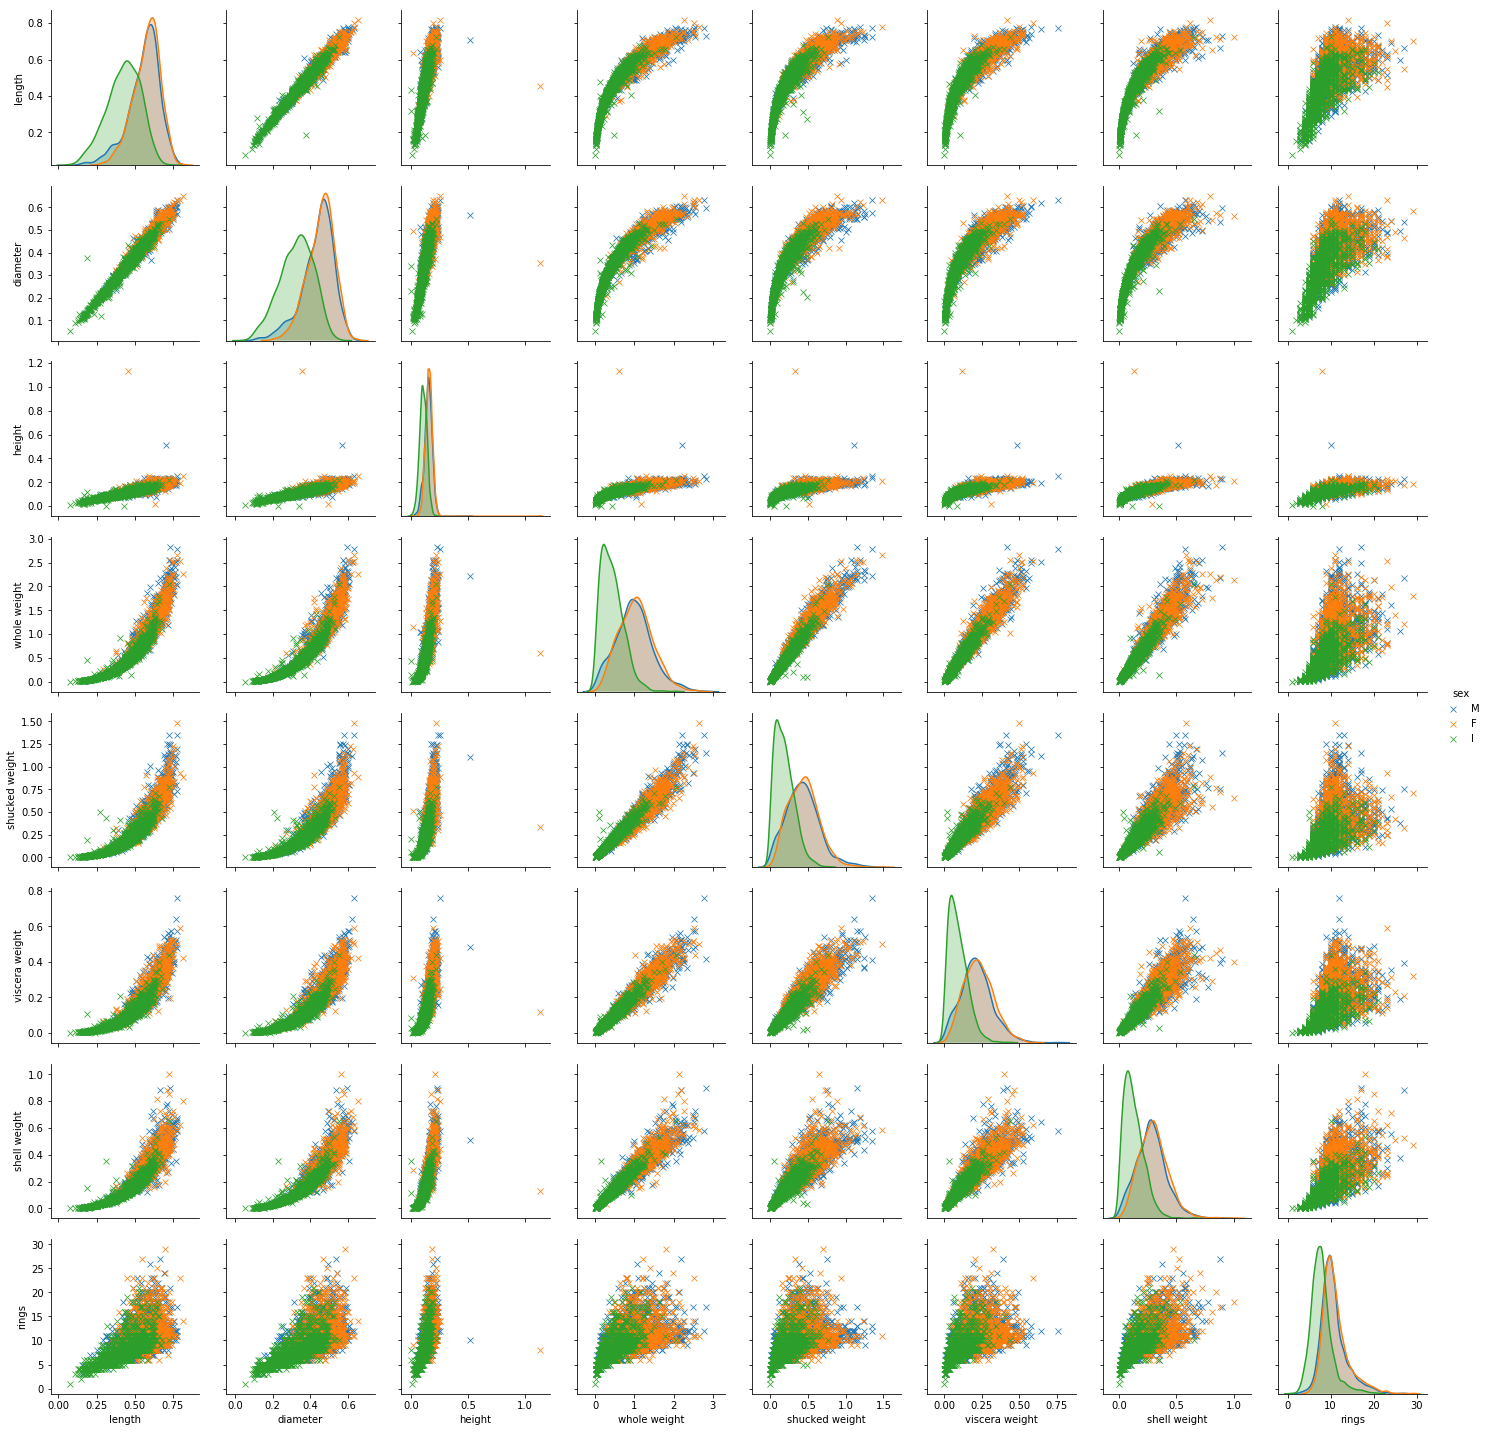

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(abalone, hue='sex', markers='x', diag_kind="kde")
plt.show()

# 회귀분석

In [42]:
abalone['Male'] = (abalone['sex']=='M').astype(int)
abalone['Female'] = (abalone['sex']=='F').astype(int)
abalone['Infant'] = (abalone['sex']=='I').astype(int)

In [51]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(abalone,train_size=0.5)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [52]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error

xtrain = train.drop(['rings','sex'],axis=1)
ytrain = train['rings']
xtest = test.drop(['rings','sex'],axis=1)
ytest = test['rings']

In [53]:
print xtrain.head()

      length  diameter  height  whole weight  shucked weight  viscera weight  \
2749   0.505     0.380   0.135        0.5385          0.2645          0.0950   
154    0.565     0.450   0.135        0.9885          0.3870          0.1495   
1533   0.295     0.215   0.070        0.1210          0.0470          0.0155   
2194   0.430     0.325   0.110        0.3675          0.1355          0.0935   
3817   0.475     0.385   0.120        0.5620          0.2890          0.0905   

      shell weight  Male  Female  Infant  
2749        0.1650     0       0       1  
154         0.3100     0       1       0  
1533        0.0405     0       0       1  
2194        0.1200     0       0       1  
3817        0.1530     1       0       0  


In [54]:
regression = linear_model.LinearRegression()
regression.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
print regression.intercept_
print train.columns,regression.coef_
zip(train.columns,regression.coef_)

3.1314507078266303
Index([u'sex', u'length', u'diameter', u'height', u'whole weight',
       u'shucked weight', u'viscera weight', u'shell weight', u'rings',
       u'Male', u'Female', u'Infant'],
      dtype='object') [  0.69160035   8.82593026  18.35229305   7.86826049 -18.60087261
 -10.29584859   9.43231612   0.27953654   0.14704802  -0.42658456]


[('sex', 0.6916003450821885),
 ('length', 8.825930264812698),
 ('diameter', 18.352293051744414),
 ('height', 7.86826048842273),
 ('whole weight', -18.600872610275747),
 ('shucked weight', -10.295848585478256),
 ('viscera weight', 9.432316123553381),
 ('shell weight', 0.27953654043577236),
 ('rings', 0.14704802249974103),
 ('Male', -0.42658456293553204)]

# 정확성

In [58]:
accuracy = regression.score(xtest,ytest)
print(accuracy*100,'%')

(51.8986559420962, '%')


In [59]:
import numpy as np
print("Mean squared error: %.2f" % np.mean((regression.predict(xtest) - ytest) ** 2))

Mean squared error: 5.34


In [60]:
ypred = regression.predict(xtest)
r2 = r2_score(ytest, ypred )
mae = mean_absolute_error(ytest, ypred)

print r2,mae

0.518986559420962 1.6118678221617493


In [61]:
y_actual_pred = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})
y_actual_pred.head()

,Actual,Predicted
436,7,7.670419
253,15,12.416607
3847,9,9.293616
3942,11,9.698236
2453,8,6.281341


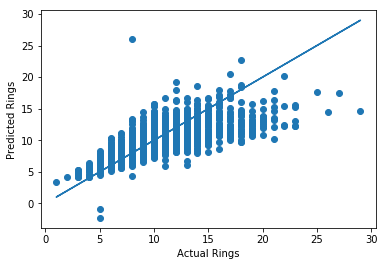

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(ytest,ypred)
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')
ax.plot(ytest,ytest)

# regression 8 9 10 단원 안나옴

# 비선형

In [64]:
import numpy as np

x=np.linspace(1,7,50)
y=np.sin(x)
x = np.array([10, 20, 30, 40, 50])
y = np.array([20, 40, 30, 10, 40])

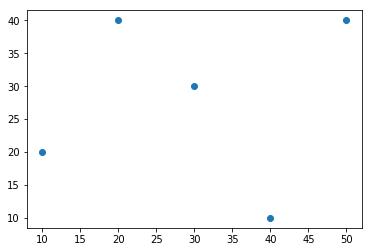

In [65]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(x,y)

In [66]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [67]:
coefficients=np.polyfit(x,y,3)
polynomial=np.poly1d(coefficients)
print "coefficients=",coefficients
print "polynomial=",polynomial

coefficients= [ 6.66666667e-03 -5.92857143e-01  1.54047619e+01 -8.20000000e+01]
polynomial=           3          2
0.006667 x - 0.5929 x + 15.4 x - 82


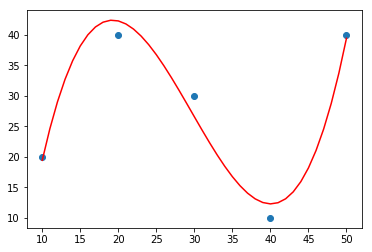

In [68]:
plt.scatter(x,y)
x50=np.arange(10,51)
plt.plot(x50,polynomial(x50),'r-')
plt.show()

# 주택가격예측

In [70]:
from sklearn import datasets
boston=datasets.load_boston()
print(boston.keys())

['filename', 'data', 'target', 'DESCR', 'feature_names']


In [71]:
print(boston.DESCR)[:1000]

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [72]:
print(boston.data.shape)

(506, 13)


In [73]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


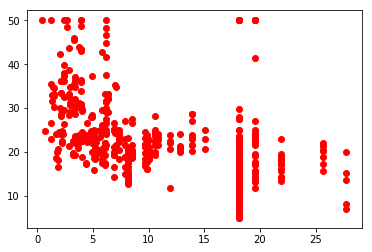

In [74]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(boston.data[:,2],boston.target,color='r')
plt.show()

In [75]:
import pandas as pd
X=pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [76]:
Y = pd.DataFrame(boston.target, columns=["MEDV"])

In [77]:
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


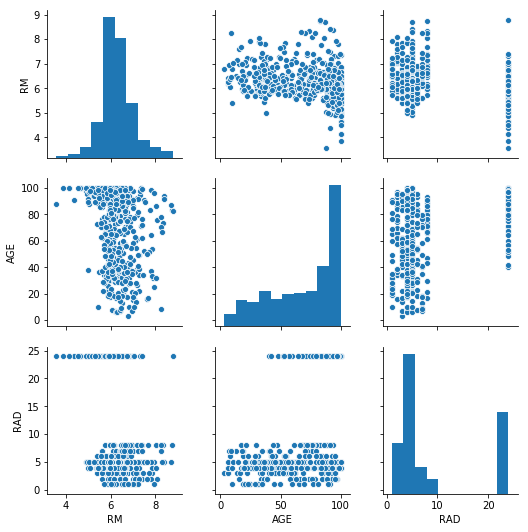

In [78]:
import seaborn as sns
cols = ["RM", "AGE", "RAD"]
sns.pairplot(X[cols])
plt.show()

In [79]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# 학습

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [82]:
Y_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((303, 1), (303, 1), (203, 13), (203, 1))

In [83]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

In [85]:
print Y_pred.shape
Y_pred.view()[:5]

(203, 1)


array([[24.58155243],
       [24.51629253],
       [29.71379915],
       [12.51132696],
       [21.34965428]])

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

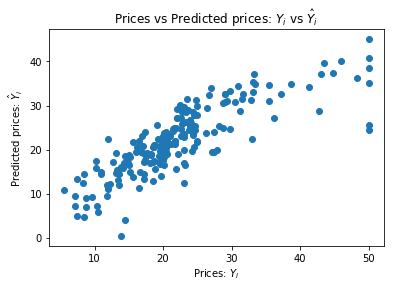

In [86]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

# 오류

In [87]:
import sklearn
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

25.79036215070249


In [88]:
import numpy as np
xarr=np.array(X)
yarr=np.array(Y)
print np.linalg.lstsq(xarr,yarr)

(array([[-9.28965170e-02],
       [ 4.87149552e-02],
       [-4.05997958e-03],
       [ 2.85399882e+00],
       [-2.86843637e+00],
       [ 5.92814778e+00],
       [-7.26933458e-03],
       [-9.68514157e-01],
       [ 1.71151128e-01],
       [-9.39621540e-03],
       [-3.92190926e-01],
       [ 1.49056102e-02],
       [-4.16304471e-01]]), array([12228.04626104]), 13, array([1.25851816e+04, 3.44597406e+03, 6.45757109e+02, 4.02050461e+02,
       1.58964612e+02, 1.21502936e+02, 9.04652420e+01, 7.79311708e+01,
       6.50828345e+01, 2.46251803e+01, 1.80945451e+01, 5.51505065e+00,
       1.48096916e+00]))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


# SPARK

In [90]:
print("boston data: ", type(boston.data), boston.data.shape)
print("boston data: ", type(boston.target), boston.target.shape)

('boston data: ', <type 'numpy.ndarray'>, (506, 13))
('boston data: ', <type 'numpy.ndarray'>, (506,))


In [91]:
v1=np.array([[1],[2],[3],[4]])
print(v1.shape)
v2=np.array([1,2,3,4])
print(v2.shape)

(4, 1)
(4,)


In [92]:
v3=[[11,22],[33,44],[55,66],[77,88]]
np.column_stack((v3,v2))

array([[11, 22,  1],
       [33, 44,  2],
       [55, 66,  3],
       [77, 88,  4]])

In [93]:
import numpy as np
XY=np.column_stack((boston.data, boston.target))
np.append(boston.feature_names,"MEDV")

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype='|S7')

In [94]:
import pandas as pd

#X=pd.DataFrame(boston.data, columns=boston.feature_names)
#Y=pd.DataFrame(boston.target, columns=["MEDV"])
Z=pd.DataFrame(XY, columns=np.append(boston.feature_names,"MEDV"))

In [95]:
Z.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [96]:
Z.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [98]:
from pyspark.sql.types import FloatType
bos=spark.createDataFrame(Z)
print bos.printSchema()
print bos.head()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: double (nullable = true)
 |-- TAX: double (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MEDV: double (nullable = true)

None
Row(CRIM=0.00632, ZN=18.0, INDUS=2.31, CHAS=0.0, NOX=0.538, RM=6.575, AGE=65.2, DIS=4.09, RAD=1.0, TAX=296.0, PTRATIO=15.3, B=396.9, LSTAT=4.98, MEDV=24.0)


In [99]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], outputCol = 'features')
bosFeatures = vectorAssembler.transform(bos)
#vhouse_df = vhouse_df.select(['features', 'MV'])
bosFeatures.show(10)

+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+--------------------+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM|  AGE|   DIS|RAD|  TAX|PTRATIO|     B|LSTAT|MEDV|            features|
+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31| 0.0|0.538|6.575| 65.2|  4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421| 78.9|4.9671|2.0|242.0|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185| 61.1|4.9671|2.0|242.0|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18| 0.0|0.458|6.998| 45.8|6.0622|3.0|222.0|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18| 0.0|0.458|7.147| 54.2|6.0622|3.0|222.0|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
|0.02985| 0.0| 2.18| 0.0|0.458| 6.43| 58.7|6.0622|3.0|222.0|   18.7|394.12| 5.21|28.7|[0.02985,0.0,2.18...|
|0.08829|12.5| 7.87| 0.0|0.5

In [100]:
bosFeatures.dtypes

[('CRIM', 'double'),
 ('ZN', 'double'),
 ('INDUS', 'double'),
 ('CHAS', 'double'),
 ('NOX', 'double'),
 ('RM', 'double'),
 ('AGE', 'double'),
 ('DIS', 'double'),
 ('RAD', 'double'),
 ('TAX', 'double'),
 ('PTRATIO', 'double'),
 ('B', 'double'),
 ('LSTAT', 'double'),
 ('MEDV', 'double'),
 ('features', 'vector')]

In [101]:
bosFeatures.describe()

DataFrame[summary: string, CRIM: string, ZN: string, INDUS: string, CHAS: string, NOX: string, RM: string, AGE: string, DIS: string, RAD: string, TAX: string, PTRATIO: string, B: string, LSTAT: string, MEDV: string]

In [102]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='MEDV', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(bosFeatures)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.03399845119576578,0.009335453239090824,0.0,2.2468408911044455,-7.225352022724502,4.348622756247579,0.0,-0.6029943279394907,0.0,0.0,-0.8220467826316253,0.008075735748825663,-0.5034884613270663]
Intercept: 20.0224922385


In [104]:
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
